In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
raw = [
    {"date":"2026-01-01","store":"A","menu":"Americano","price":"4500원","qty":"2","paid":"TRUE"},
    {"date":"2026/01/01","store":"A","menu":"Latte","price":"5,000","qty":1,"paid":"True"},
    {"date":"2026-01-02","store":"A","menu":"Latte","price":None,"qty":2,"paid":"FALSE"},
    {"date":"2026-01-03","store":"B","menu":"Mocha","price":"5500","qty":None,"paid":True},
    {"date":"2026-01-03","store":"B","menu":"Americano","price":"4500","qty":1,"paid":"TRUE"},
    {"date":"2026-01-04","store":"B","menu":"Latte","price":"5000원","qty":"3","paid":"TRUE"},
]
df = pd.DataFrame(raw)
df.head() 

,date,store,menu,price,qty,paid
0,2026-01-01,A,Americano,4500원,2,TRUE
1,2026/01/01,A,Latte,"5,000",1,True
2,2026-01-02,A,Latte,None,2,FALSE
3,2026-01-03,B,Mocha,5500,None,True
4,2026-01-03,B,Americano,4500,1,TRUE


In [10]:
df.info()
# 문자열 아닌 cols Dtype = object -> 문자열 등 결측치 존재!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6 non-null      object
 1   store   6 non-null      object
 2   menu    6 non-null      object
 3   price   5 non-null      object
 4   qty     5 non-null      object
 5   paid    6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [11]:
# 날짜
df["date"] = pd.to_datetime(df["date"], errors="coerce", format='mixed')

# price 숫자화: "4500원", "5,000" 처리
df["price"] = (df["price"].astype("string")
               .str.replace(",", "", regex=False)
               .str.replace("원", "", regex=False))
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# qty 숫자화
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

# paid bool로 통일
df["paid"] = (df["paid"].astype("string").str.upper() == "TRUE")

# 매출
df["sales"] = df["price"] * df["qty"]

df

,date,store,menu,price,qty,paid,sales
0,2026-01-01,A,Americano,4500,2.0,True,9000.0
1,2026-01-01,A,Latte,5000,1.0,True,5000.0
2,2026-01-02,A,Latte,<NA>,2.0,False,<NA>
3,2026-01-03,B,Mocha,5500,NaN,True,<NA>
4,2026-01-03,B,Americano,4500,1.0,True,4500.0
5,2026-01-04,B,Latte,5000,3.0,True,15000.0


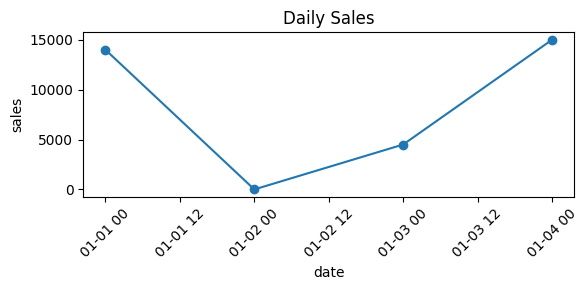

In [12]:
daily = df.groupby("date", as_index=False)["sales"].sum()

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o")
plt.title("Daily Sales")
plt.xlabel("date")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
menu_sales = df.groupby("menu", as_index=False)["sales"].sum()

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu")
plt.tight_layout()
plt.show()